# box plot 

# Load library

In [93]:
library(ggplot2)
library(Hmisc)
source("./utilis/utilis.R")
library(glue)

# Set values & table names

In [94]:
threshold = 0.005
cutoff_column = 'padj'
data_df_path =  '../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/one_wayANOVA_hMinImp_TICnorm_groupFil0.3_HILICpos_fullreport.csv'
meta_df_path =  '../../input/sequence_file/clean_deduplicated_meta_df.csv'
annot_df_path = '../../input/HILICpos_mzML/asari_project_output_727153535/Feature_annotation.tsv'

# Prepare the data

## Read and transform the data table and metadata table

In [95]:
df = read.csv(data_df_path, row.names = 1, sep = ',')
meta_df = read.csv(meta_df_path, row.names = 1)
annot_df = read.csv(annot_df_path, sep = '\t')

----

In [96]:
head(df)

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,⋯,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3,nist,q3June2014_1,q3June2014_2
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F1,85.0044,26.00,19.67,28.11,0,2003055,0.96,0.93,106,23,⋯,16.46507,17.00695,17.09726,17.05882,13.45488,15.26659,14.33267,16.25446,16.29809,16.52315
F100,130.9851,25.74,19.67,28.89,1936,3512837,1.00,0.97,217,24,⋯,16.23697,17.33909,17.29740,17.29246,11.81848,17.58103,17.49345,17.66144,17.55834,17.36552
F10000,393.2598,422.45,419.56,429.02,8551,3235844,1.00,0.90,148,17,⋯,15.61386,12.01507,12.01507,12.01507,16.84734,16.11733,17.20139,19.59158,16.12541,14.16461
F10004,393.2680,482.62,478.42,487.62,8553,1092807,0.91,0.97,51,11,⋯,16.88465,14.89055,14.89055,14.89055,16.86880,16.79105,17.52690,16.32349,15.94052,15.99033
F10006,409.2267,310.52,291.08,330.49,8979,10810474,1.00,0.95,161,24,⋯,19.20292,19.18923,19.07756,19.35677,18.49627,18.63580,18.40481,17.48562,18.17996,18.92816
F10007,409.2267,348.62,344.16,364.12,8979,2149563,1.00,0.90,69,24,⋯,13.63451,15.04201,13.74698,15.10940,12.87809,14.35426,14.57330,17.59065,16.99836,17.16847


In [97]:
grepl('Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]',colnames(df))

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE FALSE FALSE FALSE

In [98]:
data_df = df[grepl('Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]',colnames(df))]

In [99]:
head(data_df)

,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F1,14.72954,16.52419,16.46507,17.00695,17.09726,17.05882,13.45488,15.26659,14.33267
F100,17.57323,17.42220,16.23697,17.33909,17.29740,17.29246,11.81848,17.58103,17.49345
F10000,15.98142,15.86099,15.61386,12.01507,12.01507,12.01507,16.84734,16.11733,17.20139
F10004,14.89055,14.89055,16.88465,14.89055,14.89055,14.89055,16.86880,16.79105,17.52690
F10006,18.79916,19.33012,19.20292,19.18923,19.07756,19.35677,18.49627,18.63580,18.40481
F10007,14.18142,14.40873,13.63451,15.04201,13.74698,15.10940,12.87809,14.35426,14.57330


----

In [100]:
head(meta_df)

,class,biological_samples,cell_number
,<chr>,<chr>,<int>
Naive_1,Naive,Yes,300
Naive_2,Naive,Yes,300
Naive_3,Naive,Yes,300
R5neg_1,R5neg,Yes,655
R5neg_2,R5neg,Yes,687
R5neg_3,R5neg,Yes,865


----

In [101]:
annot_df[1:10,]

,X.peak.id_number,mz,rtime,apex.scan.number.,X.EmpCpd.interim_id,X.EmpCpd.ion_relation,neutral_formula,neutral_formula_mass,name_1st_guess,matched_DB_shorts,matched_DB_records
,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,F4,105.0378,29.94454,112,0,anchor,None,None,,,
2,F61,106.0411,29.41904,110,0,13C/12C,None,None,,,
3,F869,123.0485,30.20728,113,0,"anchor,+H2O",None,None,,,
4,F1028,124.0516,25.74057,96,0,"13C/12C,+H2O",None,None,,,
5,F19,117.0334,29.94454,112,1,anchor,C5H8ClN,117.034527,,,
6,F330,118.0412,30.20728,113,1,H,C5H8ClN,117.034527,,,
7,F835,136.0518,29.68179,111,1,"H,+H2O",C5H8ClN,117.034527,,,
8,F20,130.0874,31.78377,119,2,anchor,None,None,,,
9,F222,131.0908,31.25828,117,2,13C/12C,None,None,,,


In [102]:
lookUpAnnot <- function(annot_df,
                        FeatureID,
                        look4column = 'name_1st_guess') {
    output = annot_df[annot_df[,'X.peak.id_number'] == FeatureID,look4column]
    return(output)
}

In [103]:
lookUpAnnot(annot_df,'F159','name_1st_guess')

[1] "2-Chloromaleylacetate" ""

## Transform and merge data

In [104]:
source('./utilis/utilis.R')
transform_merge_data4violin <- function(df = df,
                                 meta_df = meta_df,
                                 class_column = 'class',
                                 cutoff_column = 'padj', 
                                 threshold = threshold) {
    
    df_filt <- df[df[,cutoff_column] < threshold,
              colnames(df)[grepl('Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]',colnames(df))]] # 
    df_filt.T <- t(df_filt)
    # print(head(df_filt.T))
    merged_df = merge_by_rowName(meta_df,df_filt.T, all.y = TRUE)
    merged_df[,class_column] = factor(
        merged_df[,class_column],
        level = c('Naive',
                  'R5neg',
                  'R5pos')
    )
    return(merged_df)
}

In [105]:
merged_df <- transform_merge_data4violin(df = df,
                                         meta_df = meta_df,
                                         class_column = 'class',
                                         cutoff_column = 'padj', 
                                         threshold = threshold)

In [106]:
colnames(merged_df)

[1] "class"              "biological_samples" "cell_number"       
  [4] "F10000"             "F10088"             "F10215"            
  [7] "F10612"             "F10613"             "F10620"            
 [10] "F10638"             "F10642"             "F10784"            
 [13] "F10840"             "F10861"             "F1095"             
 [16] "F10971"             "F11080"             "F11087"            
 [19] "F11116"             "F11277"             "F11350"            
 [22] "F11360"             "F11416"             "F11417"            
 [25] "F11470"             "F11565"             "F1159"             
 [28] "F11631"             "F11697"             "F11732"            
 [31] "F1182"              "F11919"             "F12049"            
 [34] "F12050"             "F12153"             "F12296"            
 [37] "F12304"             "F12402"             "F12451"            
 [40] "F12452"             "F12456"             "F12583"            
 [43] "F126"               "F1260"              "F12610"            
 [46] "F12611"             "F12683"             "F12787"            
 [49] "F12819"             "F12820"             "F12945"            
 [52] "F12963"             "F12964"             "F12998"            
 [55] "F13122"             "F13207"             "F13305"            
 [58] "F13433"             "F13470"             "F13484"            
 [61] "F13583"             "F13741"             "F13764"            
 [64] "F14022"             "F14023"             "F14058"            
 [67] "F14099"             "F1412"              "F14133"            
 [70] "F142"               "F14245"             "F14262"            
 [73] "F14263"             "F14264"             "F14279"            
 [76] "F14280"             "F14318"             "F14319"            
 [79] "F14416"             "F14471"             "F14496"            
 [82] "F14524"             "F14638"             "F14667"            
 [85] "F14669"             "F14731"             "F14744"            
 [88] "F14796"             "F14851"             "F14852"            
 [91] "F14854"             "F14870"             "F1488"             
 [94] "F1511"              "F1578"              "F1591"             
 [97] "F1596"              "F1653"              "F1676"             
[100] "F1762"              "F1763"              "F1789"             
[103] "F1797"              "F2044"              "F211"              
[106] "F2121"              "F2122"              "F2186"             
[109] "F2281"              "F2452"              "F2680"             
[112] "F2731"              "F2808"              "F281"              
[115] "F2874"              "F2928"              "F2935"             
[118] "F2957"              "F2963"              "F2985"             
[121] "F3018"              "F3023"              "F3028"             
[124] "F3115"              "F3137"              "F3208"             
[127] "F3224"              "F3319"              "F3361"             
[130] "F3368"              "F3377"              "F3388"             
[133] "F3422"              "F3433"              "F3497"             
[136] "F3521"              "F354"               "F3564"             
[139] "F3569"              "F3575"              "F3602"             
[142] "F3657"              "F3729"              "F3794"             
[145] "F3800"              "F3819"              "F3828"             
[148] "F3852"              "F3858"              "F386"              
[151] "F4007"              "F4009"              "F4023"             
[154] "F4027"              "F4035"              "F4114"             
[157] "F4150"              "F4172"              "F4238"             
[160] "F4309"              "F4316"              "F4354"             
[163] "F4372"              "F4505"              "F4507"             
[166] "F4525"              "F4535"              "F4536"             
[169] "F4541"              "F4546"              "F4718"             
[172] "F4847"              "F4851"              "F4927"             


# Output directory

In [107]:
output_dir = "../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/boxplot/"
dir.create(output_dir)

Warning message in dir.create(output_dir):
“'../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/boxplot' already exists”


# Wrapper Function: plot a single box plot

In [108]:
box_plot <- function(long_df = merged_df,
                        x = 'class',
                        y = var,
                        xlab = xlab,
                        ylab = ylab,
                        fill_color = 'class',
                        fig_width = 8,
                        fig_height = 8,
                        text_size = 20,
                        legend_size = 20,
                        axis_title_size = 20,
                        output_dir = "",
                        pdf_prefix = 'test',
                        show_plot = TRUE) {
    
    options(repr.plot.width = fig_width, repr.plot.height = fig_height)

    p <- ggplot(long_df, aes_string(x = x, y = y, fill = fill_color)) + 
        geom_boxplot(outlier.shape = NA) +
        xlab(xlab) + ylab(ylab) + 
        geom_jitter(alpha = 1) +
        scale_fill_manual(values = c("#888888","#ff0000","#0000ff")) +  #

        # set transparency
        # https://ggplot2.tidyverse.org/reference/theme.html
        theme(
          panel.grid.major = element_line(colour = "grey50",linetype = "dashed", size = 0.2),
          panel.border = element_rect(fill = NA),
          #panel.grid.minor = element_blank(),
          panel.background = element_rect(fill = "transparent",colour = NA),
          plot.background = element_rect(fill = "transparent",colour = NA),
          axis.text = element_text(size = text_size, colour="black"),
          axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5, colour="black"),
          legend.text= element_text(size = legend_size),
          legend.title = element_text(size = legend_size),
          axis.title = element_text(size = axis_title_size)
        )
    if (show_plot == TRUE) {
        print(p) # display the plot
    } else {return(p)}

    if (length(output_dir)!=0) {
            ggsave(file.path(output_dir, paste0("ggplot_boxplot_",pdf_prefix,".pdf")), width = fig_width, height = fig_height)
        }
}

# Plot a single box plot

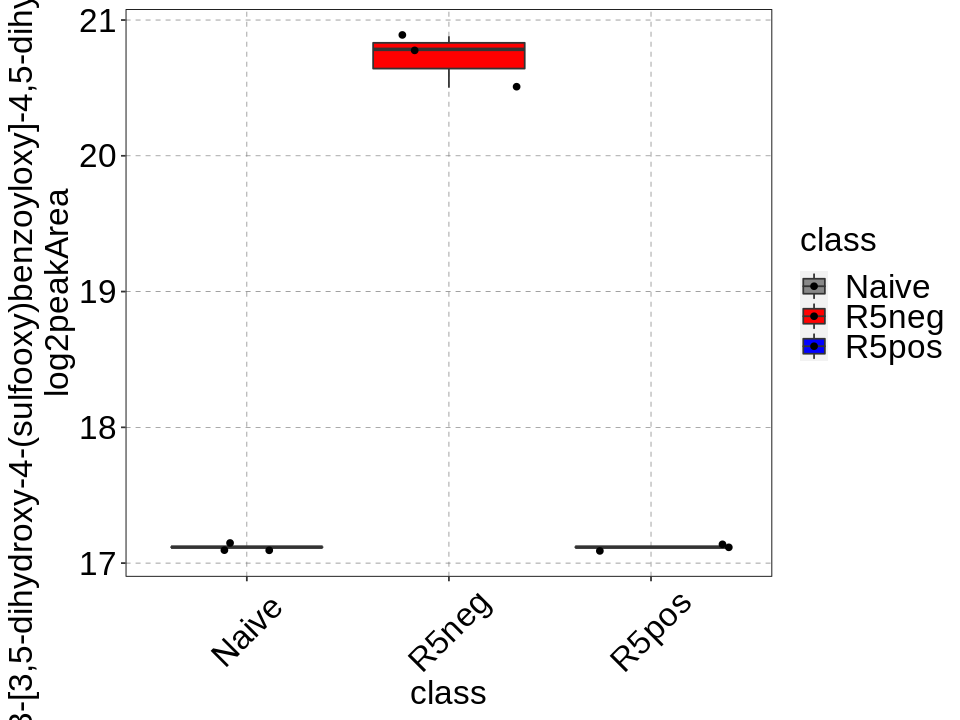

In [110]:
var <- sym('F10613')

metab_name <- lookUpAnnot(annot_df,var,'name_1st_guess')
box_plot(long_df = merged_df,
            x = 'class',
            y = var,
            xlab = 'class',
            ylab = glue('{var}_{metab_name}\nlog2peakArea'),
            fill_color = 'class',
            fig_width = 8,
            fig_height = 6,
            text_size = 20,
            legend_size = 20,
            axis_title_size = 20,
            output_dir = output_dir,
            pdf_prefix = 'test')

# Wrapper for plotting out multiple

In [111]:
head(merged_df)

,class,biological_samples,cell_number,F10000,F10088,F10215,F10612,F10613,F10620,F10638,⋯,F9521,F9526,F9543,F9598,F9703,F9784,F9785,F9809,F994,F9998
,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Naive_1,Naive,Yes,300,15.98142,19.23978,20.14315,16.19483,17.11758,19.11099,10.50084,⋯,17.84909,18.03576,14.62365,20.80202,21.57938,17.04222,15.09577,20.44503,19.15886,18.87144
Naive_2,Naive,Yes,300,15.86099,19.05464,20.14315,16.19483,17.11758,19.27078,10.50084,⋯,17.84909,18.00250,14.62365,21.26649,21.59729,16.87443,15.34669,21.24208,19.25873,18.56842
Naive_3,Naive,Yes,300,15.61386,19.32682,20.14315,16.19483,17.11758,20.45801,10.50084,⋯,17.84909,18.31860,14.62365,21.08563,21.60010,17.32727,15.69987,20.73375,19.23401,18.47099
R5neg_1,R5neg,Yes,655,12.01507,18.35225,21.44678,20.69676,20.78383,23.68180,15.49795,⋯,19.68399,17.14468,19.58212,23.38407,21.81771,15.87443,14.12388,22.65498,19.50317,16.12769
R5neg_2,R5neg,Yes,687,12.01507,18.91523,21.50556,20.16294,20.88045,23.80960,17.79496,⋯,19.63508,17.06343,21.16018,22.93769,21.74251,15.87443,14.12388,22.18328,19.48237,16.12769
R5neg_3,R5neg,Yes,865,12.01507,18.32106,21.96655,21.71787,20.50116,23.76597,18.39833,⋯,20.14068,16.72082,21.81616,23.88938,21.74000,15.87443,14.12388,22.59356,19.58235,16.12769


In [112]:
listOfFeatures = colnames(merged_df)[grepl('F[0-9]',colnames(merged_df))] # 

In [113]:
# install.packages("ggpubr")
library(ggpubr)

In [114]:
fig_l = list()
for (i in 1:length(listOfFeatures)) {

    pdf_prefix = paste('test',cutoff_column,threshold, sep = "_") # 

    featID <- listOfFeatures[[i]]
    metab_name <- lookUpAnnot(annot_df,sym(featID),'name_1st_guess')

    fig_l[[i]] <- box_plot(long_df = merged_df,
                            x = 'class', #
                            y = sym(featID),
                            xlab = 'class', # 
                            ylab = glue('{featID}_{metab_name}\nlog2peakArea'),
                            fill_color = 'class',
                            fig_width = 4,
                            fig_height = 4,
                            text_size = 8, # important in report multiple ones.
                            legend_size = 8,
                            axis_title_size = 6,
                            output_dir = NULL, # no need to define, this is for single plot
                            pdf_prefix = NULL, # no need to define, this is for single plot
                            show_plot = FALSE)
                    }
multi.page <- ggarrange(plotlist = fig_l,
                        nrow = 3, ncol = 2)
ggexport(multi.page, filename = file.path(output_dir, 
                                          paste0("ggplot_multi_ggplot_",
                                                 pdf_prefix,
                                                 ".pdf")))


# library(ggpubr)
# 
# my_comparisons = list( c("0.5", "1"), c("1", "2"), c("0.5", "2") )
# 
# ggboxplot(ToothGrowth, x = "dose", y = "len",
#           color = "dose", palette = "jco")+ 
#   stat_compare_means(comparisons = my_comparisons, label.y = c(29, 35, 40))+
#   stat_compare_means(label.y = 45)

file saved to ../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/boxplot//ggplot_multi_ggplot_test_padj_0.005.pdf

